In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as lib

In [2]:
# reading the data
df_train = pd.read_csv(r'C:\Users\mraj0\OneDrive\Desktop\loan_approval\loan_train.csv')

In [50]:
cat_data = pd.read_csv(r'C:\Users\mraj0\OneDrive\Desktop\loan_approval\loan_train.csv')

In [3]:
df_test = pd.read_csv(r'C:\Users\mraj0\OneDrive\Desktop\loan_approval\loan_test.csv')

In [4]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# Data cleaning started

In [44]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_train['Gender'].loc[df_train['Gender'].isnull()] = 'Male'

df_train['Self_Employed'].loc[df_train['Self_Employed'].isnull()] = df_train['Self_Employed'].mode()[0]

df_train['LoanAmount'].loc[df_train['LoanAmount'].isnull()] = df_train['LoanAmount'].mean()

df_train['Loan_Amount_Term'].loc[df_train['Loan_Amount_Term'].isnull()] = df_train['Loan_Amount_Term'].mean()

df_train['Credit_History'].loc[df_train['Credit_History'].isnull()] = df_train['Credit_History'].mean()

df_train['Married'].loc[df_train['Married'].isnull()] = df_train['Married'].mode()[0]

df_train['Dependents'].loc[df_train['Dependents'].isnull()] = df_train['Dependents'].mode()[0]

C:\Users\mraj0\AppData\Local\Temp\ipykernel_17856\2129805139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Gender'].loc[df_train['Gender'].isnull()] = 'Male'
C:\Users\mraj0\AppData\Local\Temp\ipykernel_17856\2129805139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Self_Employed'].loc[df_train['Self_Employed'].isnull()] = df_train['Self_Employed'].mode()[0]
C:\Users\mraj0\AppData\Local\Temp\ipykernel_17856\2129805139.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [6]:
df_train['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
# data has been cleaned

In [ ]:
# Analysis

In [17]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [31]:
ge = df_train[df_train['Education']=='Graduate']

In [34]:
gm = ge.groupby('Married')

In [40]:
gm.max()

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Married,,,,,,,,,,,,
No,LP002990,Male,3+,Graduate,Yes,37719,41667.0,650.0,480.0,1.0,Urban,Y
Yes,LP002984,Male,3+,Graduate,Yes,81000,20000.0,700.0,480.0,1.0,Urban,Y


In [41]:
gm.min()

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Married,,,,,,,,,,,,
No,LP001002,Female,0,Graduate,No,416,0.0,9.0,36.0,0.0,Rural,N
Yes,LP001003,Female,0,Graduate,No,150,0.0,17.0,12.0,0.0,Rural,N


<Axes: xlabel='Dependents', ylabel='ApplicantIncome'>

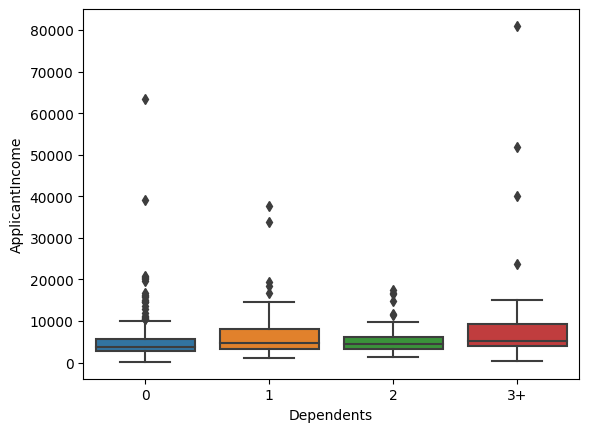

In [46]:
sns.boxplot(x ='Dependents', y = 'ApplicantIncome', data = ge )

In [7]:
#df = pd.concat([df_train,df_test],axis=0)

In [7]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df_train['Dependents'].replace({'3+':'3'},inplace=True)

In [9]:
df_train['Dependents']=pd.to_numeric(df_train['Dependents'])

In [10]:
df_train = df_train.drop('Loan_ID',axis = 1)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lb = LabelEncoder()

In [14]:
df_train['Gender'] = lb.fit_transform(df_train['Gender'])
df_train['Married'] = lb.fit_transform(df_train['Married'])
df_train['Self_Employed'] = lb.fit_transform(df_train['Self_Employed'])
df_train['Education'] = lb.fit_transform(df_train['Education'])
df_train['Property_Area'] = lb.fit_transform(df_train['Property_Area'])

In [15]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,Y


In [16]:
df_train['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [17]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [18]:
x = df_train.drop('Loan_Status',axis=1)

In [19]:
y = df_train['Loan_Status']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_text,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2549)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lgr = LogisticRegression()

In [24]:
lgr.fit(x_train,y_train)

c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
lgr.score(x_text,y_test)

0.8054054054054054

In [26]:
df_train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


<Axes: >

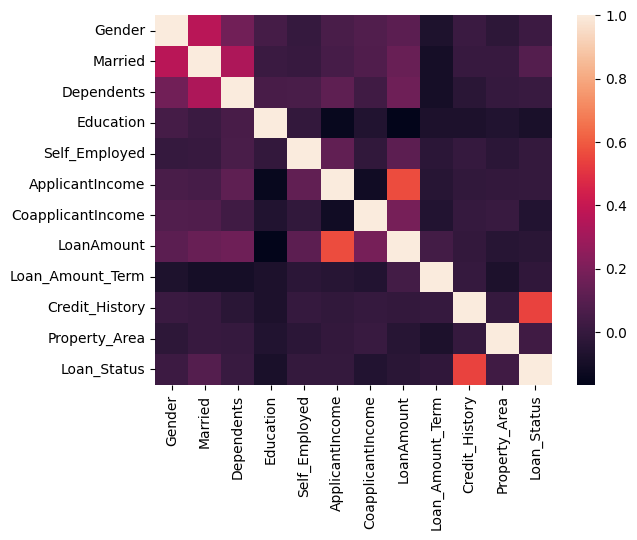

In [27]:
sns.heatmap(df_train.corr())

<Axes: >

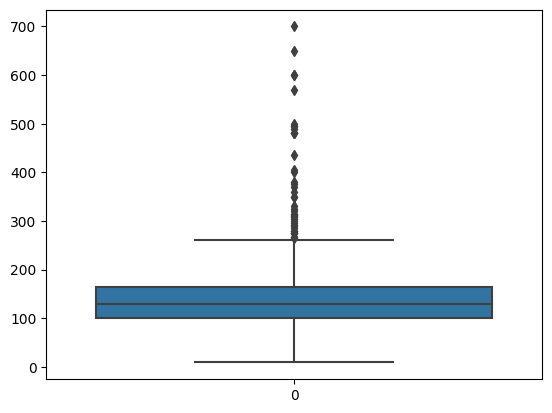

In [28]:
sns.boxplot(df_train['LoanAmount'])

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
rf.score(x_text,y_test)

0.7837837837837838

In [33]:
rf.score(x_train,y_train)

1.0

In [34]:
rfs = RandomForestClassifier()

In [35]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [36]:
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]          # Minimum number of samples required to be at a leaf node
}

In [37]:
model = GridSearchCV(estimator=rfs,param_grid=param_grid,cv = 5)

In [38]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [39]:
model.best_score_

0.811108071135431

In [40]:
model.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [41]:
rfs2 = RandomForestClassifier(max_depth = 20,
 min_samples_leaf = 4,
 min_samples_split = 2,
 n_estimators =  150)

In [42]:
rfs2.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=150)

In [43]:
rfs2.score(x_text,y_test)

0.8108108108108109

In [44]:
rfs2.score(x_train,y_train)

0.8391608391608392

In [45]:
import pickle

In [46]:
with open('model.pickle','wb' ) as model:
    pickle.dump(rfs2,model)

In [48]:
x_text.iloc[0]

Gender                  1.0
Married                 1.0
Dependents              1.0
Education               0.0
Self_Employed           0.0
ApplicantIncome      2787.0
CoapplicantIncome    1917.0
LoanAmount            146.0
Loan_Amount_Term      360.0
Credit_History          0.0
Property_Area           0.0
Name: 584, dtype: float64

In [49]:
rfs2.predict([np.array(x_text.iloc[0])])

c:\Python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [57]:
cat_data[cat_data['Gender']=='Male']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [54]:
cat_data[cat_data['Gender']=='Male'].index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       601, 602, 603, 605, 606, 607, 608, 610, 611, 612],
      dtype='int64', length=489)

In [56]:
df_train.loc[cat_data[cat_data['Gender']=='Male'].index[0]]

Gender                  1.000000
Married                 0.000000
Dependents              0.000000
Education               0.000000
Self_Employed           0.000000
ApplicantIncome      5849.000000
CoapplicantIncome       0.000000
LoanAmount            146.412162
Loan_Amount_Term      360.000000
Credit_History          1.000000
Property_Area           2.000000
Loan_Status             1.000000
Name: 0, dtype: float64

In [58]:
cat_data[cat_data['Gender']=='Female']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
37,LP001112,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.0,1.0,Semiurban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
48,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,LP002917,Female,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y


In [59]:
df_train.loc[cat_data[cat_data['Gender']=='Female'].index[0]]

Gender                  0.0
Married                 0.0
Dependents              0.0
Education               0.0
Self_Employed           0.0
ApplicantIncome      3510.0
CoapplicantIncome       0.0
LoanAmount             76.0
Loan_Amount_Term      360.0
Credit_History          0.0
Property_Area           2.0
Loan_Status             0.0
Name: 17, dtype: float64

In [60]:
cat_data[cat_data['Married'] =='Yes']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [61]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [62]:
df_train.loc[1]['Married']

1.0

In [63]:
df_train.to_csv('numerical_data.csv',index = False)